In [1]:
import nbsetup as nb
import numpy as np
import ensemblepy as ep
from simulations.daisy_world.models import DaisyWorld
from simulations.daisy_world.series import series

In [2]:
import numpy as np
np.random.seed(4020)

In [3]:
pop3 = {'white': {'albedo': 0.75, 'initial': 0.3}, 'black': {'albedo': 0.25, 'initial': 0.3}}

# Perturbation

One of the best ways to think about ergodic complexity is in the form of stability. As in the more stable a system, as in the larger the equilibrium basin, as in the more likely a system is to end up in the same exact state if left to evolve the less _ergodically complex_ it is.

Stability analysis usually takes the form of non-linear dynamics, where you take a system and perturb it. That is, if you knock a system (like a pendulum) how likely is it to return back to it's original position.

Here we see that ergodic complexity as a measure can also measure pertubation, but not taking an analytical approach but an empirical one and observing many different simulations.

In [4]:
def perturb(luminosity=1.0, population=pop3, ensembles=10, start=200, finish=200, percent=0.5, name=None):
    worlds = [DaisyWorld(population, luminosity=luminosity) for e in range(ensembles)]
    x, y = range(start+finish), [[w.observations() for w in worlds]]
    
    # run for all worlds, for first section
    for i in x[1:start]:
        nb.cp(percent, i)
        y.append([w.step(True) for w in worlds])
    
    # perturb system with a plague
    for w in worlds:
        w.plague(percent=percent, name=name)
    
    # run for the rest of time
    for i in x[start:]:
        nb.cp(percent, i)
        y.append([w.step(True) for w in worlds])
    
    y = np.array(y)
    bins = ep.binint(0,y.max()+1)
    return x, y, worlds, bins

# Perturb Daisyworld

Below we introduce a plague into Daisyworld, killing off a certain _percentage p_ of the daisies. By scanning over a few different extreme values of _p_ we can simulate how robust the system is to a perturbation of this sort.

In [4]:
percents = np.linspace(0.95, 1.0, 50)
y = [perturb(percent=p) for p in percents]

1.0 399


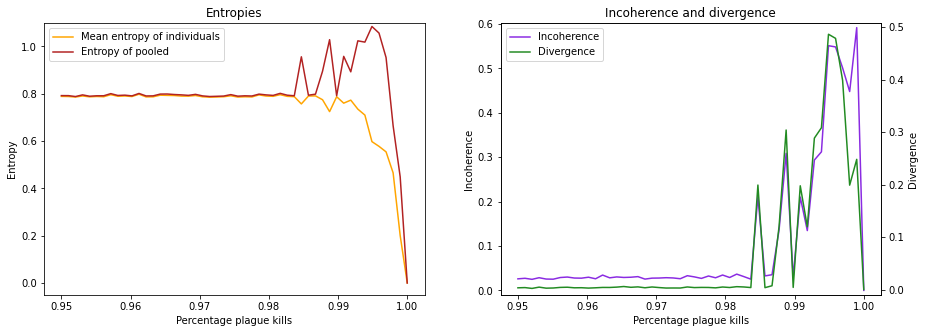

In [5]:
scan = ep.Scan(x=percents, x_label="Percentage plague kills", y=y)
scanfig = scan.plot()

We can see for values less than 98% the system is very robust. Looking at the specific evolution for 95% we see.

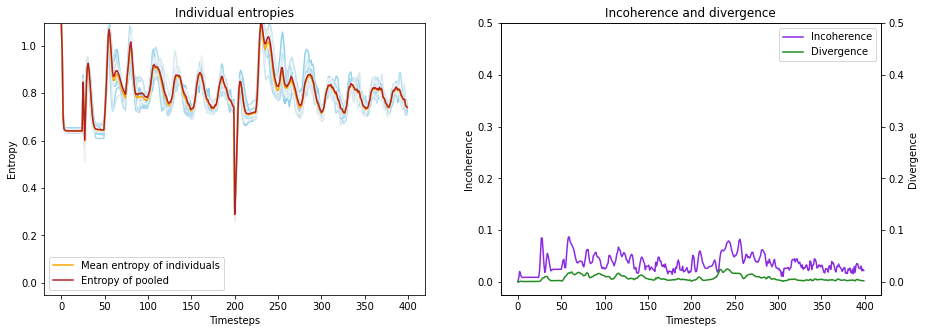

In [6]:
s97 = scan.map[0.95].plot()

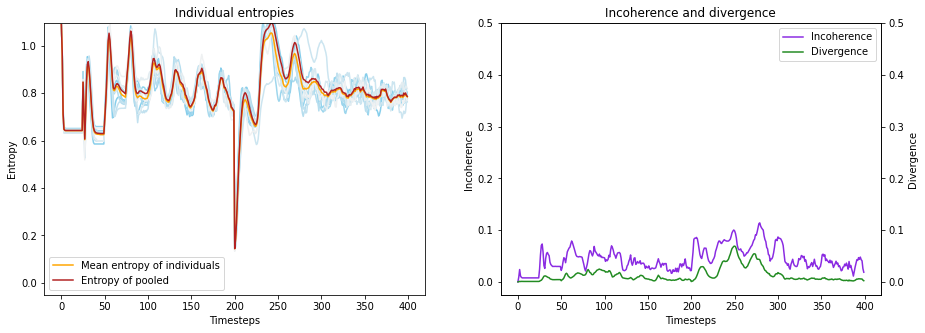

In [7]:
s97 = scan.map[0.9775510204081632].plot()

While for 98.5%+ we see that some of the systems do not recover from the plague, but many do into two different equilibrium positions.

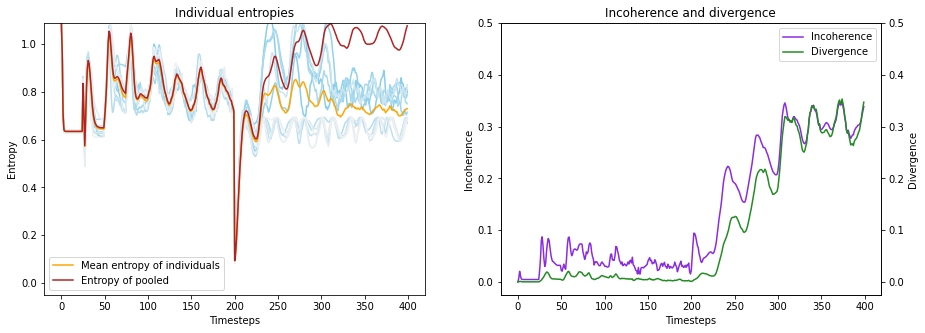

In [8]:
s98 = scan.map[0.9887755102040816].plot()

While obviously at 1.0 where all the daises die, there is no recovering for any system so the ergodic complexity is low again.

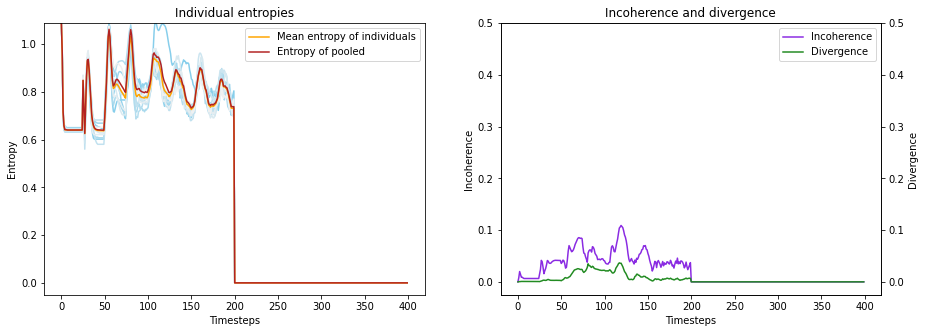

In [11]:
x = scan.map[1.0].plot()

## Other peaks

We can then use this same technique to see how robust other parameters of the system is, for instance looking at the luminosity = 0.871 criticality point we find.

What's interesting is you would expect given this is a critical peak that the system was more fragile to perturbation. However it seems for the systems that survive, the temperature of the world increases to a place that is favourable for the daises. Meaning the self organising system, makes the conditions sustainably favourable for future daises. Meaning when we kill off most of the population, the systems which are already dead remain so as the temperature is too high to sustain daises, but the systems which survived continue to do so, because of the favourable temperature the world has created.

In [ ]:
peak90 = perturb(0.871, start=200, finish=200, percent=0.90)
x = peak90.plot()

## Figures for paper

<AxesSubplot:title={'center':'Distribution of all observations (pooled)'}, xlabel='value', ylabel='Probability'>

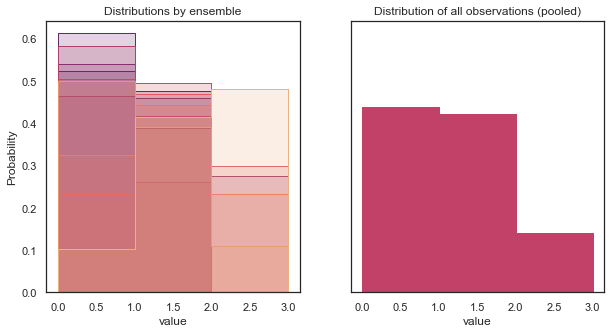

In [24]:
scan.map[0.9887755102040816].map[270].plot()

In [131]:
from itertools import combinations
import scipy as sp

def incohesion(pmfs, bin_count=10):
    """
    """
    divs = []
    for a, b in combinations(pmfs, 2):
        pe = ep.pooled_entropy([a,b], base=2)
        ee = ep.ensemble_entropies([a,b], base=2)
        divs.append(ep.js_divergence(pe, ee, [len(a), len(b)]))
    bins = ep.binspace(0, 1, count=bin_count)
    h, _ = np.histogram(divs, bins=bins)
    return -1/sp.stats.differential_entropy(divs), 1+sp.stats.entropy(divs)-np.log(len(divs))

In [132]:
incohesion(ens.histograms)

(0.7974439082543912, 0.5337456554313693)

In [133]:
incohesion(scan.map[1.0].map[399].histograms)

/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/scipy/stats/_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


(0.0, nan)

In [134]:
incohesion(scan.map[1.0].map[120].histograms)

(0.2619214877956013, -0.21850476420036236)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

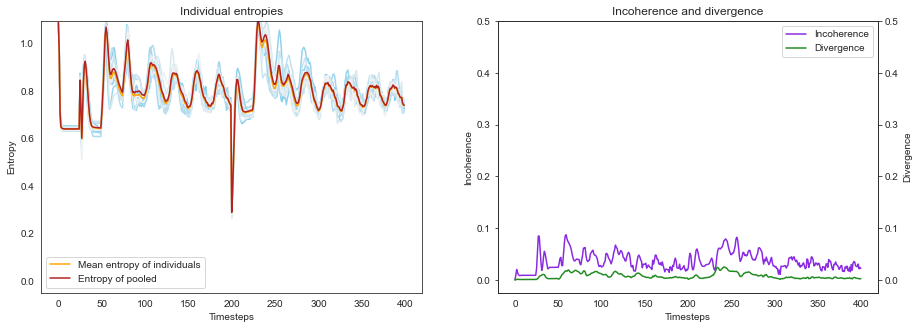

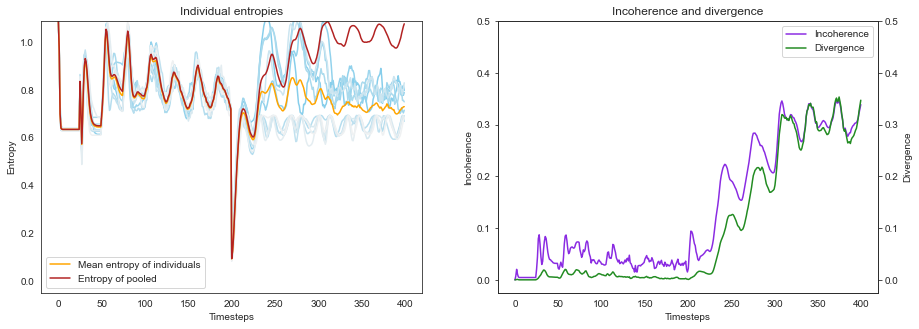

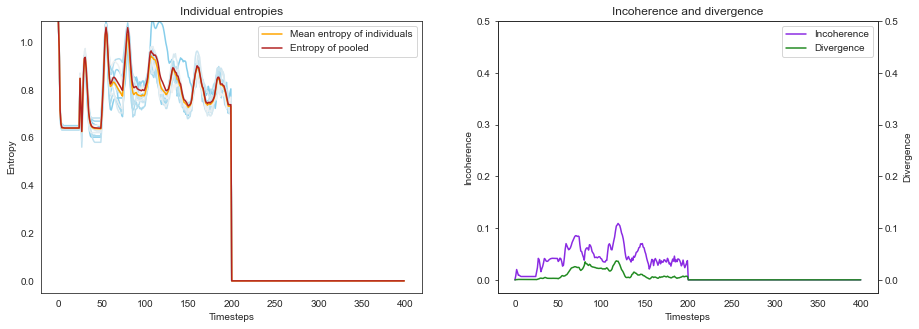

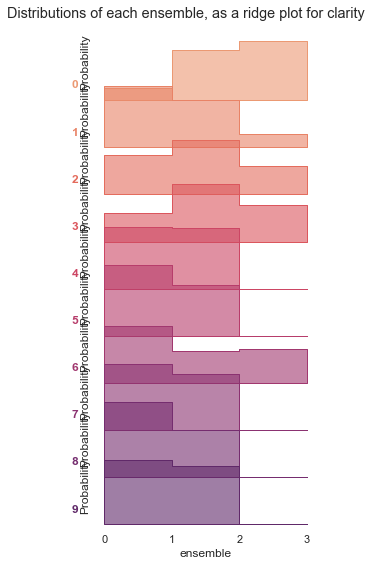

In [20]:
if True:
    scanfig.savefig('figures/4.5-daisy-scan.eps')
    scan.map[0.95].plot().savefig('figures/4.5-daisy-0.95.eps')
    scan.map[0.9887755102040816].plot().savefig('figures/4.5-daisy-0.98.eps')
    scan.map[1.0].plot().savefig('figures/4.5-daisy-1.0.eps')